In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGqDlZlURZuB6xvvSxMAOMIjDLSozTOaqHFrOxBK_hRxJFHHgkzROM
Mounted at /content/drive


In [7]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras

import numpy as np 
import pandas as pd
import glob
import cv2
import os
from pathlib import Path
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

import os
import tensorflow as tf
from keras import layers
from keras import Model
from os import getcwd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout,Flatten
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tf.keras.applications.xception import preprocess_input


In [4]:
data_dir = Path('/content/COVID Splitaug2') # Your Dataset Location Path
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
#test_dir2 = os.path.join(data_dir, 'Test2')
val_dir = os.path.join(data_dir, 'Val')
train_malaria_dir = os.path.join(train_dir, 'COVID') #Replace the folder names
train_uninfected_dir = os.path.join(train_dir, 'NON-COVID')
validation_malaria_dir = os.path.join(val_dir, 'COVID')
validation_uninfected_dir = os.path.join(val_dir, 'NON-COVID')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
#test_malaria_dir2 = os.path.join(test_dir2, 'COVID') #Replace the folder names
#test_uninfected_dir2 = os.path.join(test_dir2, 'NON-COVID')

train_malaria_fnames = os.listdir(train_malaria_dir)
train_uninfected_fnames = os.listdir(train_uninfected_dir)
validation_malaria_fnames = os.listdir(validation_malaria_dir)
validation_uninfected_fnames = os.listdir(validation_uninfected_dir)
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
##test_malaria_fnames2 = os.listdir(test_malaria_dir2)
#test_uninfected_fnames2 = os.listdir(test_uninfected_dir2)


print(len(train_malaria_fnames))
print(len(validation_malaria_fnames))
print(len(train_uninfected_fnames))
print(len(validation_uninfected_fnames))
print("Test Covid", len(test_malaria_fnames))
print("Test Noncovid", len(test_uninfected_fnames))



955
60
1170
58
Test Covid 98
Test Noncovid 105


In [9]:
train_datagen = ImageDataGenerator(#rescale=1./255
                                  preprocessing_function=tf.keras.applications.xception.preprocess_input
                                   #rotation_range = 20,
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   #shear_range = 0.2,
                                   #zoom_range = 0.2,
                                    #horizontal_flip = True
                                   )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(299, 299)
                                                    )
validation_datagen = ImageDataGenerator(#rescale=1./255
                                        preprocessing_function=tf.keras.applications.xception.preprocess_input
                                        )
 

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(299, 299))

Found 2125 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [10]:
model = keras.applications.Xception(input_shape = (299, 299, 3), 
                                include_top = True, 
                                weights = 'imagenet')


for layer in model.layers:
    layer.trainable = True
  
    
model.summary()

91889664/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [11]:
last_layer = model.get_layer('avg_pool')
last_output = last_layer.output

x = keras.layers.Dense(2,activation='softmax')(last_output)           

model = Model( model.input, x) 

model.compile(optimizer = Adam(lr=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [12]:
early = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=1
)
#history = model.fit(
            #x=X_train, y=y_train, 
             #       batch_size=16,
              #      epochs=50, 
               #     validation_data=(X_val , y_val),callbacks = [early],
            #
            #verbose=1
        #)
history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 20, #callbacks = [early]
            )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
133/133 [==============================] - 338s 3s/step - loss: 0.5695 - acc: 0.7407 - val_loss: 0.5632 - val_acc: 0.7627
Epoch 2/20
133/133 [==============================] - 340s 3s/step - loss: 0.3206 - acc: 0.9031 - val_loss: 0.3885 - val_acc: 0.8559
Epoch 3/20
133/133 [==============================] - 343s 3s/step - loss: 0.1806 - acc: 0.9567 - val_loss: 0.2343 - val_acc: 0.9407
Epoch 4/20
133/133 [==============================] - 337s 3s/step - loss: 0.0908 - acc: 0.9878 - val_loss: 0.1694 - val_acc: 0.9492
Epoch 5/20
133/133 [==============================] - 328s 2s/step - loss: 0.0534 - acc: 0.9948 - val_loss: 0.1606 - val_acc: 0.9407
Epoch 6/20
133/133 [==============================] - 339s 3s/step - loss: 0.0374 - acc: 0.9953 - val_loss: 0.1358 - val_acc: 0.9492
Epoch 7/20
133/133 [==============================] - 351s 3s/step - loss: 0.0269 - acc: 0.9976 - val_loss: 0.1391 - val_acc: 

In [13]:

data_dir = Path('/content/COVID Splitaug2')
test_dir = os.path.join(data_dir, 'Test')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
print(len(test_malaria_fnames))
print(len(test_uninfected_fnames))

98
105


In [14]:
testGenerator = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(test_dir, 
                                                      batch_size=16,
                                                    class_mode='categorical',shuffle=False,target_size=(299,299)
                                                      )

Found 203 images belonging to 2 classes.


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
batch_size = 16
num_of_test_samples = 203
predictions = model.predict_generator(testGenerator)

y_pred = np.argmax(predictions, axis=1)

true_classes = testGenerator.classes

class_labels = list(testGenerator.class_indices.keys())   

print(class_labels)

print(confusion_matrix(testGenerator.classes, y_pred))

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

Instructions for updating:
Please use Model.predict, which supports generators.
['COVID', 'NON-COVID']
[[ 84  14]
 [  4 101]]
              precision    recall  f1-score   support

       COVID       0.95      0.86      0.90        98
   NON-COVID       0.88      0.96      0.92       105

    accuracy                           0.91       203
   macro avg       0.92      0.91      0.91       203
weighted avg       0.92      0.91      0.91       203



In [16]:
model.evaluate(testGenerator)

13/13 [==============================] - 5s 357ms/step - loss: 0.4524 - acc: 0.9113


[0.4523836374282837, 0.9113300442695618]

In [17]:
from sklearn.metrics import  f1_score,roc_auc_score
f1_score(testGenerator.classes, y_pred)


0.9181818181818183

In [18]:
roc_auc_score(testGenerator.classes, y_pred)

0.9095238095238096

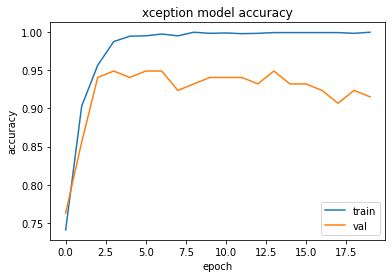

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('xception model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('cnnaccpneu1.png')
plt.show()